An Application that will help predict the change in a student's test score based on taking a test preparation class and their parent's level of education

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets

This will read the dataset into the program

In [100]:
data_df = pd.read_csv("test_scores2.csv")

Displays a small portion of the raw data

In [101]:
data_df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Gives a breakdown of the test scores for each subject

In [102]:
data_df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Further breakdown of the test scores verses having taken a prep course or not

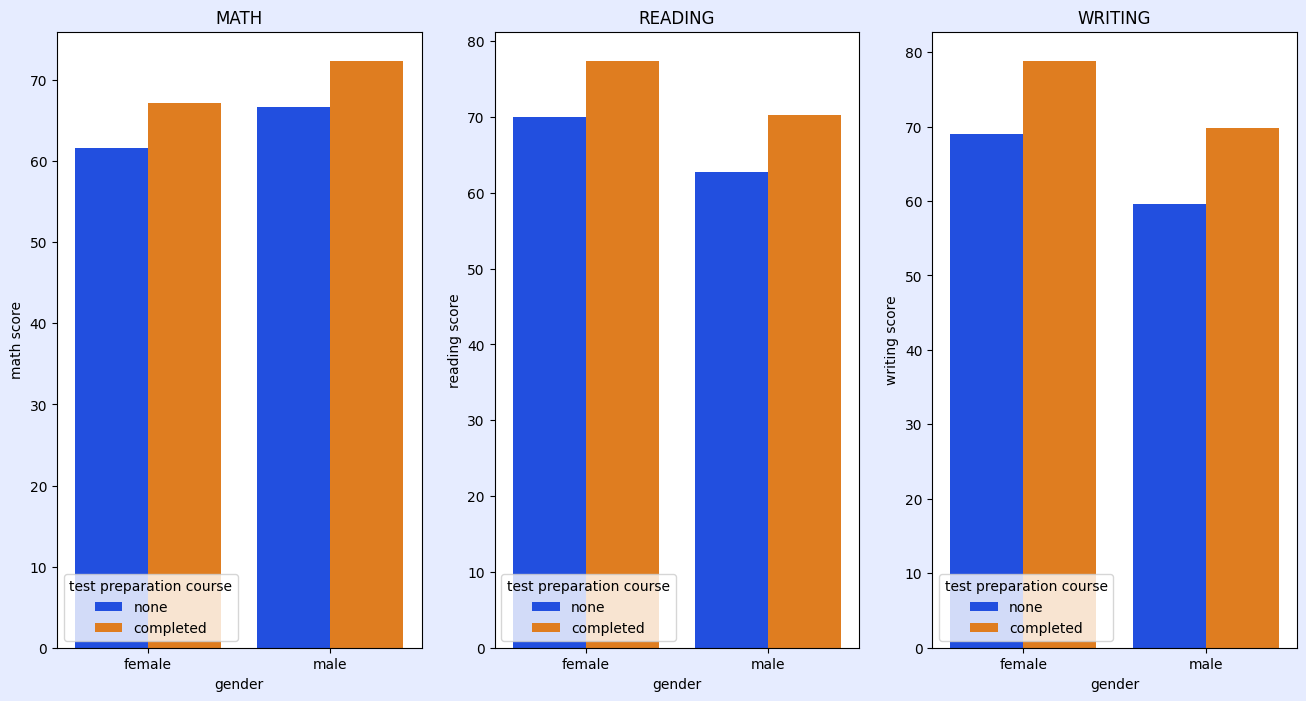

In [114]:
plt.rcParams['figure.facecolor'] = "#e6ecff"
plt.rcParams['axes.facecolor'] = "#e6ecff"
plt.figure(figsize=(16,8))
plt.style.use('default')
plt.subplot(1, 3, 1)
sns.barplot(x='gender',y='math score',data=data_df,hue='test preparation course',palette='bright', errorbar=None)
plt.title('MATH' ,color='black')
plt.legend(loc='lower left', title='test preparation course')
plt.subplot(1, 3, 2)
sns.barplot(x='gender',y='reading score',data=data_df,hue='test preparation course',palette='bright', errorbar=None)
plt.title('READING' ,color='black')
plt.legend(loc='lower left', title='test preparation course')
plt.subplot(1, 3, 3)
sns.barplot(x='gender',y='writing score',data=data_df,hue='test preparation course',palette='bright', errorbar=None)
plt.title('WRITING' ,color='black')
plt.legend(loc='lower left', title='test preparation course')
plt.show()

Breakdown of the parent's level of education for the data set

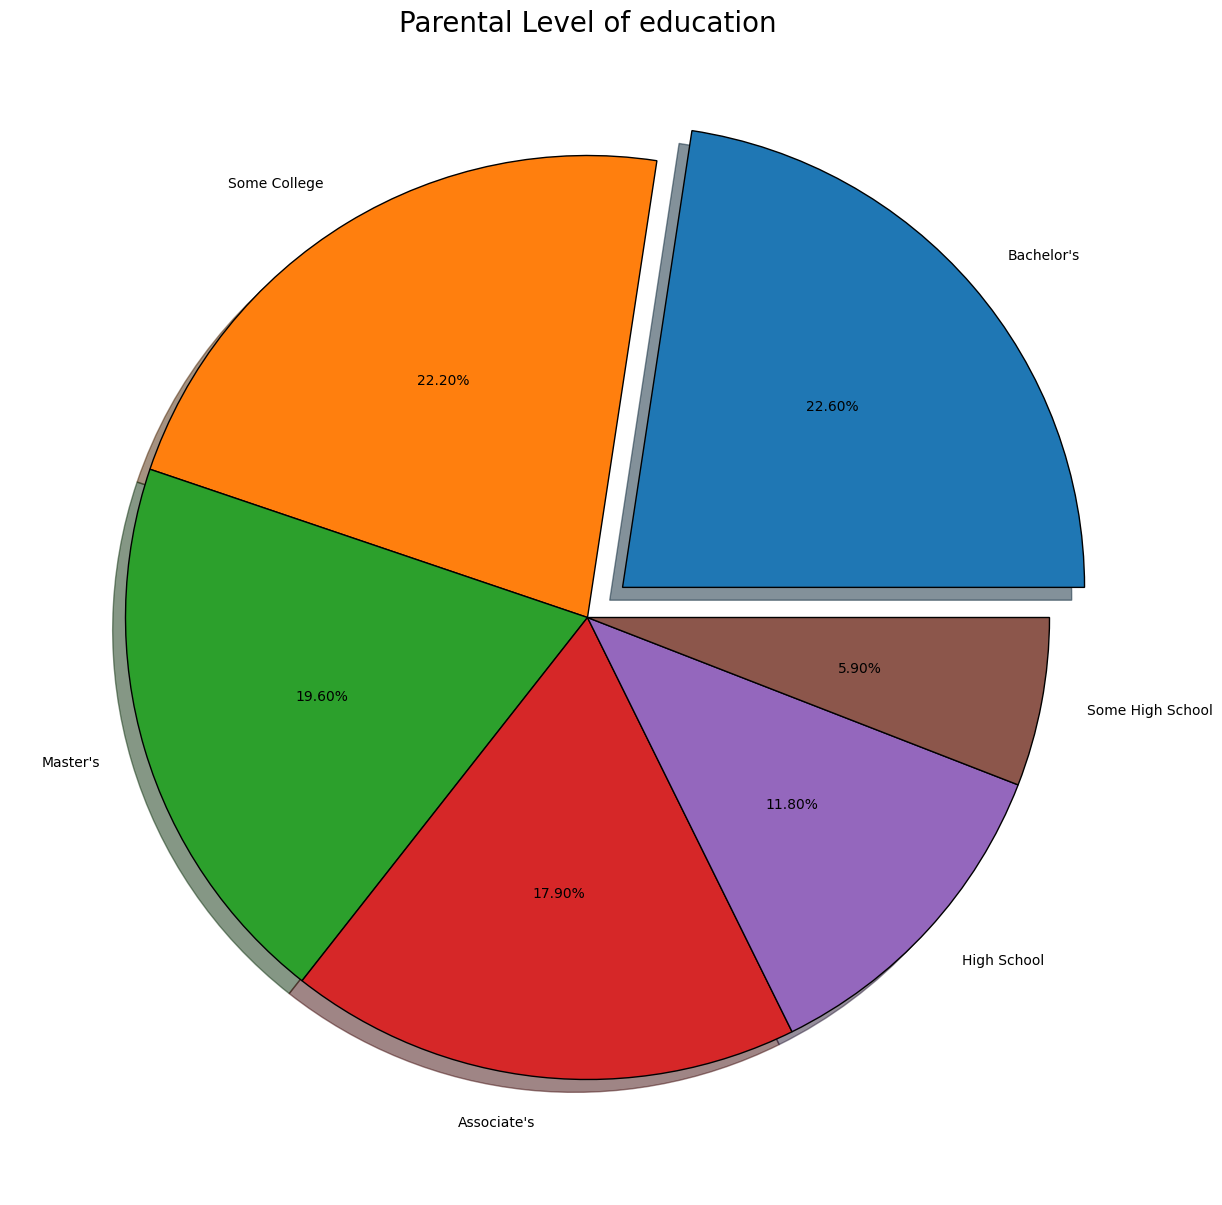

In [104]:
data=data_df['parental level of education'].value_counts()
plt.style.use('default')
labels=['Bachelor\'s', 'Some College', 'Master\'s', 'Associate\'s', 'High School', 'Some High School']
explode=[0.1, 0, 0, 0, 0, 0]
plt.figure(figsize=(30,15))
plt.pie(data, labels=labels ,radius=1 ,autopct='%0.2f%%', explode=explode, shadow=True, wedgeprops={'edgecolor':'black'})
plt.title('Parental Level of education' ,fontsize=20 ,color='black')
plt.show()

Levels of education and cumulative score ranges

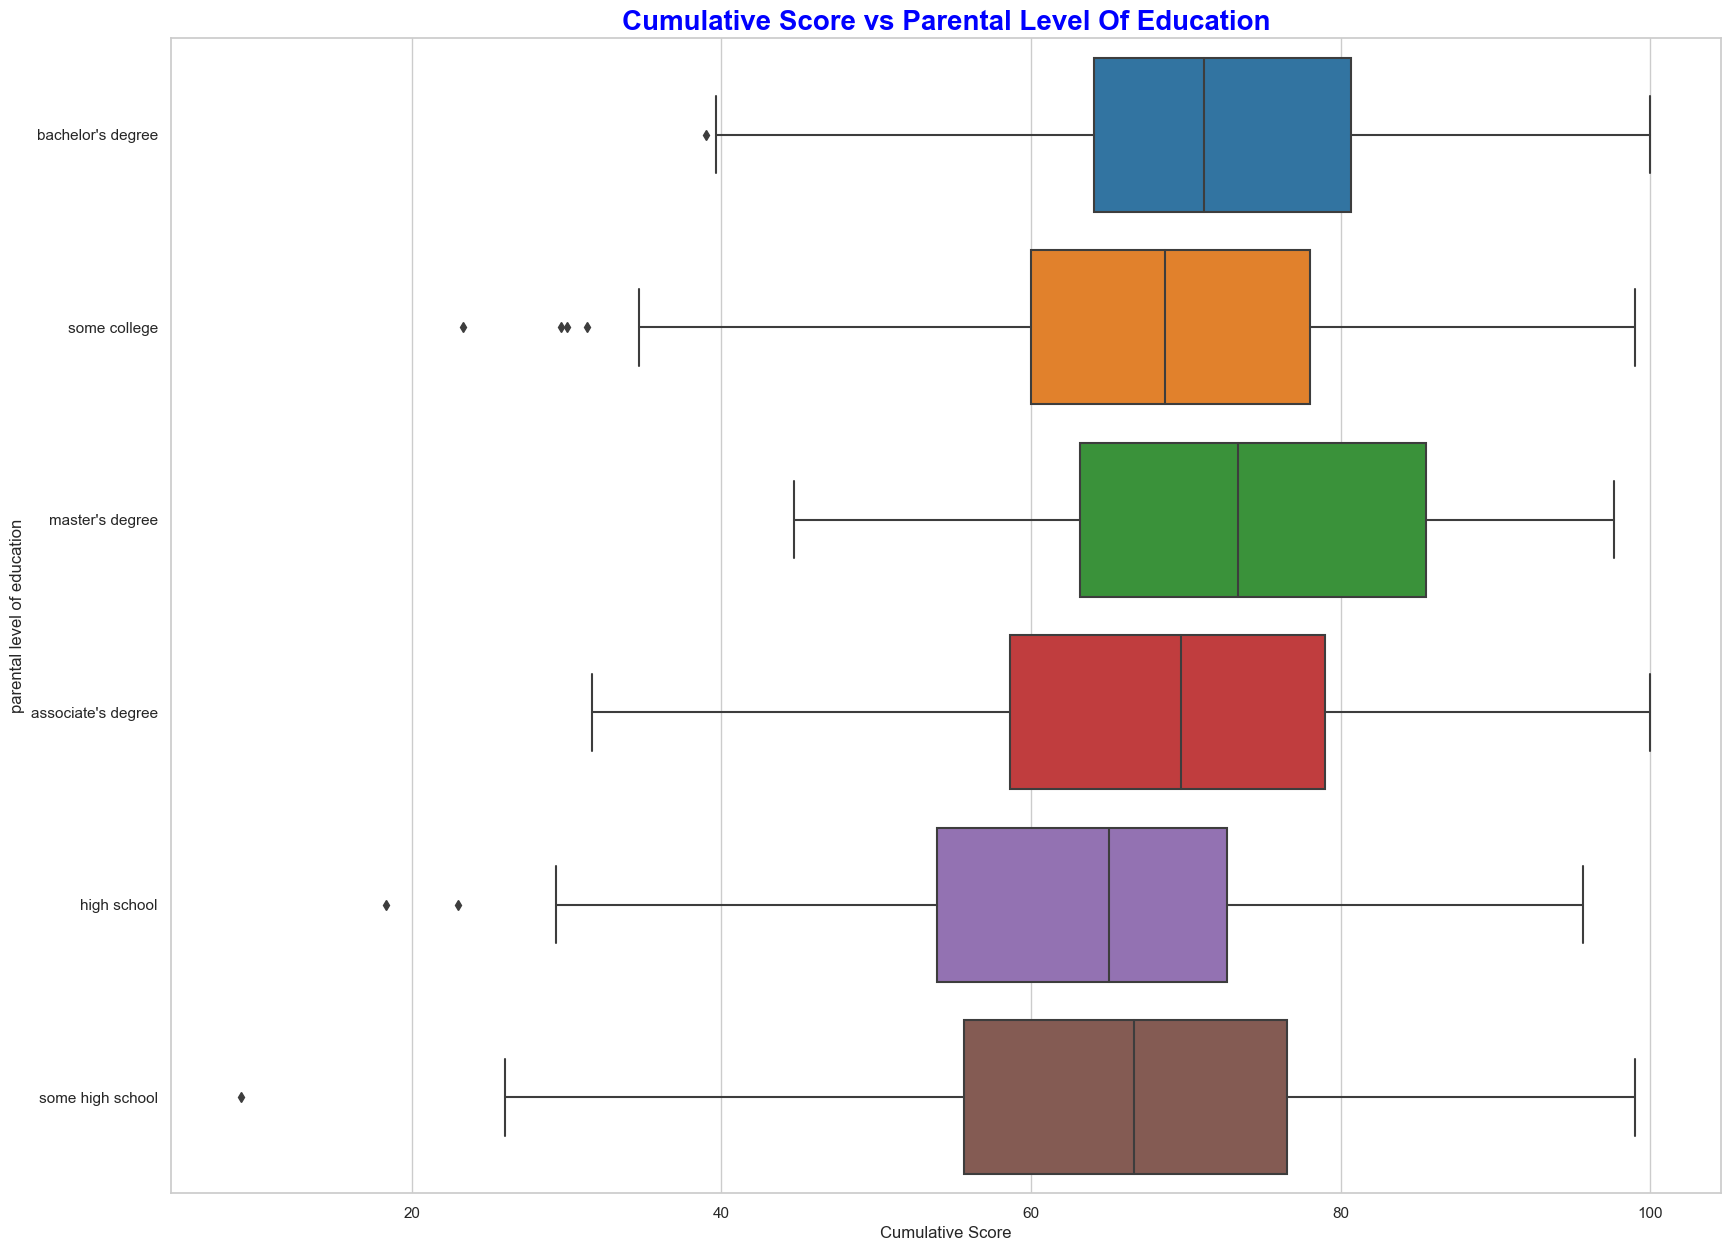

In [106]:
data_df['Cumulative Score'] = (data_df['math score']+data_df['reading score']+data_df['writing score'])/3
sns.set_style('whitegrid')
sns.set_context("notebook",font_scale=1)
plt.figure(figsize=(20,15))
sns.boxplot(data=data_df, x='Cumulative Score', y='parental level of education')
plt.title('Cumulative Score vs Parental Level Of Education',fontsize=20, fontweight='bold', color='black')

plt.show()

All scores for math, writing, reading, and cumulative plus all education levels to give an idea of where everyone falls

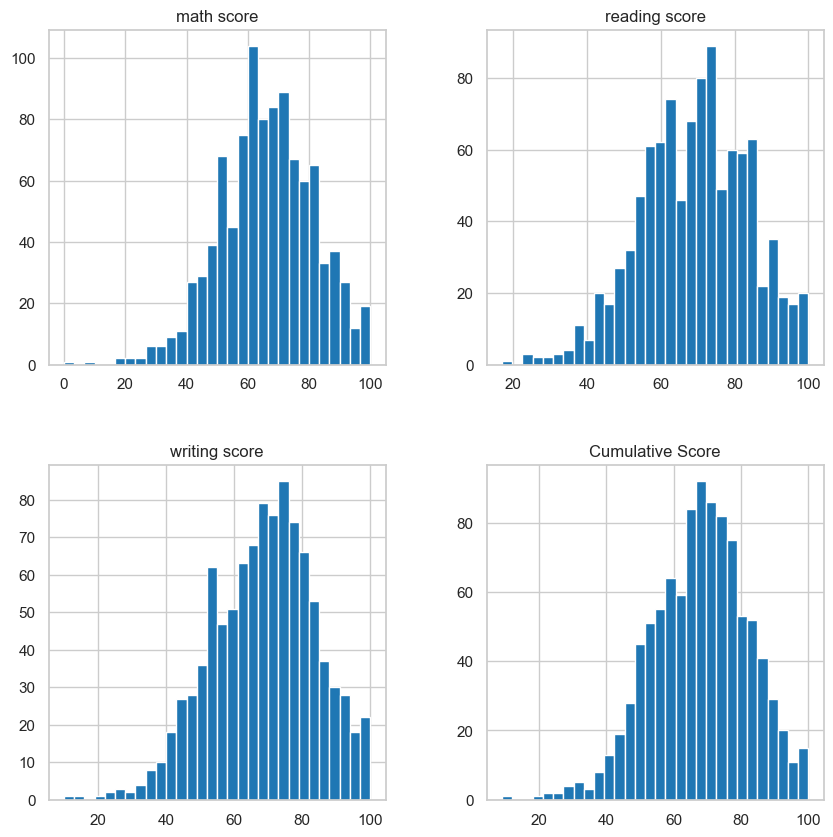

In [107]:
data_df.hist(bins = 30, figsize=(10,10))
plt.show()

A more refined look at test scores with and without the test prep class

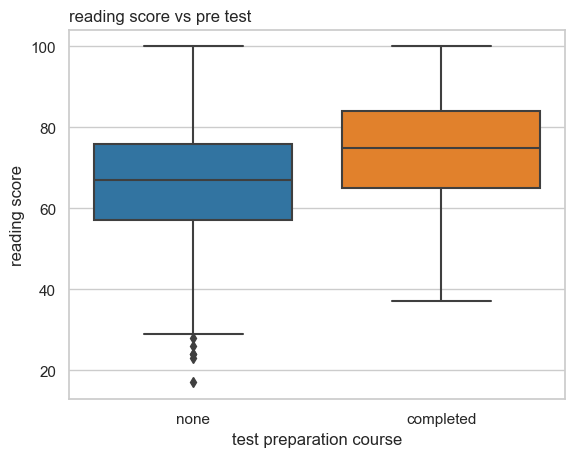

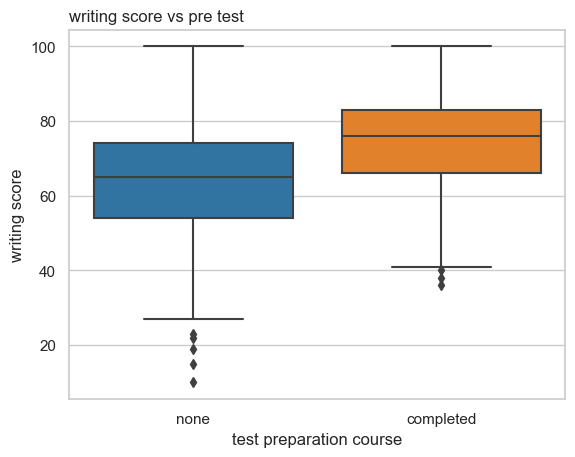

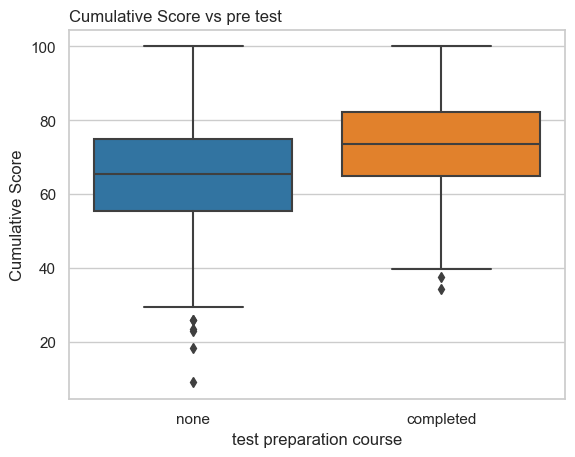

In [108]:
for item in data_df.columns[-3:]:
    sns.boxplot(x=data_df["test preparation course"], y=data_df[item])
    plt.title(item+" vs pre test", loc="left")
    plt.show()

Code to display projected change in scores when a test preparation class is taken

In [117]:
def display(education_level):
    plt.style.use('classic')
    get(education_level).plot(title='Projected Score change', figsize=(12,8))
    plt.xlabel('No Prep course ---->> Taken Prep course')
    plt.legend(loc='lower right')

Function to model projected change in scores based on parental level of education and test preparation

In [118]:
def get(education_level):
    temp1 = data_df.loc[(data_df['test preparation course'] == 'none') & (data_df['parental level of education'] == education_level)]
    dataFrame1 = temp1.groupby('parental level of education').mean(numeric_only=True).round(2)
    temp2 = data_df.loc[(data_df['test preparation course'] == 'completed') & (data_df['parental level of education'] == education_level)]
    dataFrame2 = temp2.groupby('parental level of education').mean(numeric_only=True).round(2)
    result = dataFrame1.compare(dataFrame2, align_axis=0).rename(index={'self': 'No Test Prep', 'other': 'With Test Prep'})
    return result

In [119]:
educationSelection = widgets.Dropdown(options =['some high school', 'high school', 'some college',
                                             "bachelor's degree", "associate's degree", "master's degree"],
                                     value="bachelor's degree", description="Average Parental Education Level",
                                     style=dict(description_width='initial'),  layout=dict(width='350px'))

Widgets to select which education level you wish to see the changes

In [120]:
widgets.interact(get, education_level = educationSelection)
widgets.interact(display, education_level = educationSelection)

interactive(children=(Dropdown(description='Average Parental Education Level', index=3, layout=Layout(width='3…

interactive(children=(Dropdown(description='Average Parental Education Level', index=3, layout=Layout(width='3…

<function __main__.display(education_level)>

This transfors category data into numbers

In [93]:
X_train = data_df.drop(['math score', 'reading score', 'writing score'], axis=1)
y_train_math = data_df['math score'].copy()
y_train_reading = data_df['reading score'].copy()
y_train_writing = data_df['writing score'].copy()

In [94]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
attrs = data_df.columns[:5]
category_attrs = attrs

full_pipeline = ColumnTransformer([('category', OneHotEncoder(), category_attrs)])

X_train = full_pipeline.fit_transform(X_train)

Training the random forest regression models

In [95]:
from sklearn.ensemble import RandomForestRegressor

forest_regr_math = RandomForestRegressor(random_state=42)
forest_regr_math.fit(X_train, y_train_math)

forest_regr_reading = RandomForestRegressor(random_state=42)
forest_regr_reading.fit(X_train, y_train_math)

forest_regr_writing = RandomForestRegressor(random_state=42)
forest_regr_writing.fit(X_train, y_train_math)

RandomForestRegressor(random_state=42)

Here is where we predict training data

In [96]:
from sklearn.metrics import mean_squared_error

def predict(model, X, y, tag):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    print('prediction for ' + tag + ': rmse = ', rmse)

In [97]:
print('Random Forest Regressor ----------------')
predict(forest_regr_math, X_train, y_train_math, 'math score')
predict(forest_regr_reading, X_train, y_train_reading, 'reading score')
predict(forest_regr_writing, X_train, y_train_writing, 'writing score')


Random Forest Regressor ----------------
prediction for math score: rmse =  11.96104820381514
prediction for reading score: rmse =  14.000495257742422
prediction for writing score: rmse =  14.137929143915368
